# Introduction

This notebook was created for the purpose of experimenting with natural language processing libraries and other tools, following tutorials online.

In this file, we go through various aspects of NLP, including:

* applying OCR tool to extract text from an image
* introducing stopwords and removing them from further research
* processing the dataset by cleaning text from punctuation marks, numbers and other symbols
* practicing tokenization and finding root words (stemming & lemmatization)
* counting frequency of words in a dataset
* getting familiar with a concept of Bag of Words
* visualising the text data using a word cloud (tweet analysis) in two shapes

First, let's import libraries that might be necessary in our analysis and run few commands to improve the Jupyter Notebook view in terms of page width, number of rows and columns as well as the width of cells.

In [1]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

To begin our analysis, let's dive into optical character recognition (OCR).

## OCR test - easyocr

If you haven't installed easy OCR before, you can do it right in the cell, executing each of these uncommented commands separately.

In [2]:
# !pip install opencv-python-headless==4.1.2.30
# !pip3 install torch torchvision torchaudio
# !pip install easyocr

In [3]:
from easyocr import Reader

D:\Progs\Media\Anaconda\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


Next, load dictionaries of the languages of your text. Let's test how the model works for both English and Spanish.
The full list of available languages can be found here: https://www.jaided.ai/easyocr/

In [4]:
reader_en_es = Reader(['en', 'es'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


We're now defining a function that will run a selected model on a chosen picture using a proper dictionary.

In [5]:
def read_text(image_name, model_name, in_line=True):
    text = model_name.readtext(image_name, detail = 0, paragraph=in_line)
    return '\n'.join(text)

### English text

Our first example text is presented below. It's a screenshot from [New York Times](https://www.nytimes.com/2022/12/20/world/americas/argentina-messi-world-cup-parade-buenos-aires.html) about Argentina winning FIFA World Cup in Qatar (2022).

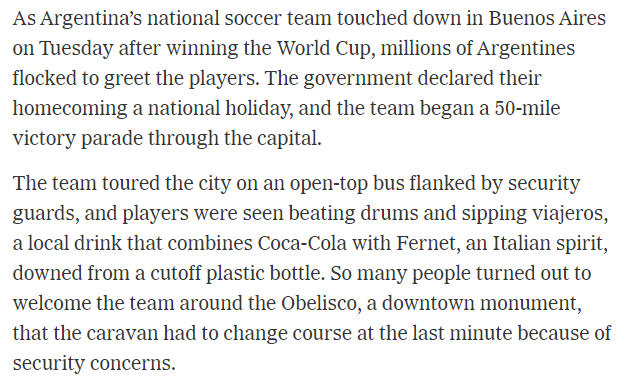

In [6]:
from IPython.display import Image
Image(filename='img/english_example.png') 

In [7]:
eng_sample_text = read_text('img/english_example.png', reader_en_es)
print(eng_sample_text)

As Argentina's national soccer team touched down in Buenos Aires on Tuesday after winning the World Cup; millions of Argentines flocked to greet the players. The government declared their homecoming a national holiday; and the team began a 50-mile victory parade through the capital
The team toured the city on an open-top bus flanked by security guards, and players were seen beating drums and sipping viajeros; a local drink that combines Coca-Cola with Fernet, an Italian spirit, downed from a cutoff plastic bottle. So many people turned out to welcome the team around the Obelisco; a downtown monument; that the caravan had to change course at the last minute because of security concerns


The model did a pretty good job when it comes to text recognition. There are minor issues in distinguishing commas (,) from semicolon (;). In this example two dots at the end of last sentences in each paragraph are missing. However, the overall result is satisfying. All words have been recognized correctly and there are no spelling mistakes.

### Spanish text

Now, let's see a Spanish example from a [Ultima webpage](https://www.ultima-affinity.com/es/es/perro/como-pasear-perro/) about how to walk your dog properly.  

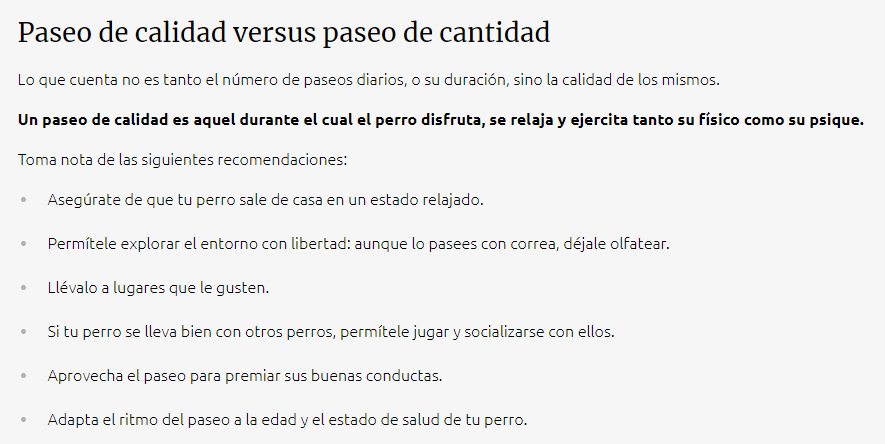

In [9]:
Image(filename='img/ejemplo_espanol_texto.png') 

In [10]:
esp_sample_text = read_text('img/ejemplo_espanol_texto.png', reader_en_es)
print(esp_sample_text)

Paseo de calidad versus paseo de cantidad Lo cue cuenta no es tanto elnúmero de paseos diarios, 0 S0 duración, sinc la calicad de los mismos
Un paseo de calidad es aquel durante el cual el perro disfruta_ relaja y ejercita tanto su físico como su psique.
Toma nota de las siguientes recomencaciones:
AsegúrateCeque tu perro sale de casa en un estado relajado.
Permítele explorar elentorno con libertac:auncue lo Pasees con correa, Céjale olfatear
Llévalo lugares que legusten
Si tu Perro se lleva bien con otros Perros, Permítele jugar y socializarse con ellos
Aprovecha elPaseo para premiar sus buenas concuctas_
Adapta elritmo del paseo la edac yelestado Ce saluc ce tu perro.


## Krish Naik Live Day 2

Now, let's dive into a YouTube course from Krish Naik. 

Krish Naik is a teacher and a creator of multiple machine learning and data science courses and educational videos. In his Natural Language Processing series, he explains concepts associated with this field in detail and provides helpful excercises to practice newly acquired skills.

In [11]:
!pip install nltk

Traceback (most recent call last):
  File "d:\progs\media\anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "d:\progs\media\anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Progs\Media\Anaconda\Scripts\pip.exe\__main__.py", line 4, in <module>
ModuleNotFoundError: No module named 'pip'


In [12]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

We'll start with a basic paragraph of text. Since I personally love Iberian culture and I'm currently on my workation in Barcelona, my example will be about this beautiful city. It's a Wikipedia note about [Barcelona](https://en.wikipedia.org/wiki/Barcelona) and it contains some basic information.

In [13]:
paragraph = ''' Barcelona is a city on the coast of northeastern Spain. It is the capital and largest city of the autonomous community of Catalonia, as well as the second most populous municipality of Spain. With a population of 1.6 million within city limits,[7] its urban area extends to numerous neighbouring municipalities within the Province of Barcelona and is home to around 4.8 million people,[3] making it the fifth most populous urban area in the European Union after Paris, the Ruhr area, Madrid, and Milan.[3] It is one of the largest metropolises on the Mediterranean Sea, located on the coast between the mouths of the rivers Llobregat and Besòs, and bounded to the west by the Serra de Collserola mountain range, the tallest peak of which is 512 metres (1,680 feet) high.
Founded as a Roman city, in the Middle Ages Barcelona became the capital of the County of Barcelona. After joining with the Kingdom of Aragon to form the confederation of the Crown of Aragon, Barcelona, which continued to be the capital of the Principality of Catalonia, became the most important city in the Crown of Aragon and the main economic and administrative centre of the Crown, only to be overtaken by Valencia, wrested from Arab domination by the Catalans, shortly before the dynastic union between the Crown of Castile and the Crown of Aragon in 1492. Barcelona has a rich cultural heritage and is today an important cultural centre and a major tourist destination. Particularly renowned are the architectural works of Antoni Gaudí and Lluís Domènech i Montaner, which have been designated UNESCO World Heritage Sites. The city is home to two of the most prestigious universities in Spain: the University of Barcelona and Pompeu Fabra University. The headquarters of the Union for the Mediterranean are located in Barcelona. The city is known for hosting the 1992 Summer Olympics as well as world-class conferences and expositions and also many international sport tournaments.'''

It's crucial to download NLTK punctuation module (punkt). As mentioned in the NLTK documentations, <i> this tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences</i>.

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

The next step transforms each sentence into an element of a list. The output is one list containing multiple elements - sentences of a chosen paragraph. 

In [15]:
sentences = nltk.sent_tokenize(paragraph)
sentences

[' Barcelona is a city on the coast of northeastern Spain.',
 'It is the capital and largest city of the autonomous community of Catalonia, as well as the second most populous municipality of Spain.',
 'With a population of 1.6 million within city limits,[7] its urban area extends to numerous neighbouring municipalities within the Province of Barcelona and is home to around 4.8 million people,[3] making it the fifth most populous urban area in the European Union after Paris, the Ruhr area, Madrid, and Milan.',
 '[3] It is one of the largest metropolises on the Mediterranean Sea, located on the coast between the mouths of the rivers Llobregat and Besòs, and bounded to the west by the Serra de Collserola mountain range, the tallest peak of which is 512 metres (1,680 feet) high.',
 'Founded as a Roman city, in the Middle Ages Barcelona became the capital of the County of Barcelona.',
 'After joining with the Kingdom of Aragon to form the confederation of the Crown of Aragon, Barcelona, wh

Next, we're transforming words to their root versions by reducing an inflected word ending. This process is called <b>stemming</b>. Stemming might result in words that do not have a semantic meaning, but still might be useful when it comes to finding a common base for multiple words. For example, a stem for 'university' is 'univers'.

In [16]:
stemmer = PorterStemmer()
stemmer.stem('university')

'univers'

If we want to obtain a root word with a semantic meaning, we should perform <b>lemmatization</b>. This process takes more time than stemming, but provides a meaningful result. It might be more suitable for your use, depending on the type of problem you're trying to solve.
For lemmatization we import WordNetLemmatizer.

In [17]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

For example, a stem for 'expositions' is 'exposition'.

In [18]:
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('expositions')

'exposition'

Next, we'd like to clean this input a little bit. For each sentence in this paragraph, we want to keep only letters (deleting numbers, punctutation marks etc.) and change all letters to lowercase. The results are presented below. 

In [19]:
import re
corpus = []

for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    corpus.append(review)
    
corpus

[' barcelona is a city on the coast of northeastern spain ',
 'it is the capital and largest city of the autonomous community of catalonia  as well as the second most populous municipality of spain ',
 'with a population of     million within city limits     its urban area extends to numerous neighbouring municipalities within the province of barcelona and is home to around     million people     making it the fifth most populous urban area in the european union after paris  the ruhr area  madrid  and milan ',
 '    it is one of the largest metropolises on the mediterranean sea  located on the coast between the mouths of the rivers llobregat and bes s  and bounded to the west by the serra de collserola mountain range  the tallest peak of which is     metres        feet  high ',
 'founded as a roman city  in the middle ages barcelona became the capital of the county of barcelona ',
 'after joining with the kingdom of aragon to form the confederation of the crown of aragon  barcelona  wh

### Root words

#### Stemming

Let's find a base for each word from this paragraph, omitting stopwords. These are the words that commonly occur in an everyday language use, but don't provide much of a meaning. Examples of stopwords:

In [20]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Please be aware that there is no universal list of stopwords that would be suitable for all NLP problems. In some cases it may be crucial not to omit some of these words, for example those which refer to negation (no, not etc.) or other chosen feature.

In [21]:
for i in corpus:
    words = nltk.word_tokenize(i)
    for word in words:
        if word not in set(stopwords.words('english')):
            print(stemmer.stem(word))

barcelona
citi
coast
northeastern
spain
capit
largest
citi
autonom
commun
catalonia
well
second
popul
municip
spain
popul
million
within
citi
limit
urban
area
extend
numer
neighbour
municip
within
provinc
barcelona
home
around
million
peopl
make
fifth
popul
urban
area
european
union
pari
ruhr
area
madrid
milan
one
largest
metropolis
mediterranean
sea
locat
coast
mouth
river
llobregat
be
bound
west
serra
de
collserola
mountain
rang
tallest
peak
metr
feet
high
found
roman
citi
middl
age
barcelona
becam
capit
counti
barcelona
join
kingdom
aragon
form
confeder
crown
aragon
barcelona
continu
capit
princip
catalonia
becam
import
citi
crown
aragon
main
econom
administr
centr
crown
overtaken
valencia
wrest
arab
domin
catalan
shortli
dynast
union
crown
castil
crown
aragon
barcelona
rich
cultur
heritag
today
import
cultur
centr
major
tourist
destin
particularli
renown
architectur
work
antoni
gaud
llu
dom
nech
montan
design
unesco
world
heritag
site
citi
home
two
prestigi
univers
spain
univers
ba

#### Lemmatization

In [22]:
for i in corpus:
    words = nltk.word_tokenize(i)
    for word in words:
        if word not in set(stopwords.words('english')):
            print(lemmatizer.lemmatize(word))

barcelona
city
coast
northeastern
spain
capital
largest
city
autonomous
community
catalonia
well
second
populous
municipality
spain
population
million
within
city
limit
urban
area
extends
numerous
neighbouring
municipality
within
province
barcelona
home
around
million
people
making
fifth
populous
urban
area
european
union
paris
ruhr
area
madrid
milan
one
largest
metropolis
mediterranean
sea
located
coast
mouth
river
llobregat
be
bounded
west
serra
de
collserola
mountain
range
tallest
peak
metre
foot
high
founded
roman
city
middle
age
barcelona
became
capital
county
barcelona
joining
kingdom
aragon
form
confederation
crown
aragon
barcelona
continued
capital
principality
catalonia
became
important
city
crown
aragon
main
economic
administrative
centre
crown
overtaken
valencia
wrested
arab
domination
catalan
shortly
dynastic
union
crown
castile
crown
aragon
barcelona
rich
cultural
heritage
today
important
cultural
centre
major
tourist
destination
particularly
renowned
architectural
work
an

In the example above we can see how root words differ in two methods of transforming to root word. In stemming, we usually obtain short words that give an idea on the word meaning. In lemmatization, we get a list of meaningful words. Some examples are following: 

* capit vs. capital
* municip vs. municipality
* neighbour vs. neighbouring

### Frequency of each word

As we may see, there are stopwords in the text, which don't bring much value. We didn't remove them in previous steps, but we may do it now to make further analysis more meaningful.

In [23]:
cachedStopWords = stopwords.words('english') # storing the list increases the speed of removal process 

paragraph_clean = re.sub('[^a-zA-Z\.\,]', ' ', paragraph).lower()
paragraph_whitespace = re.sub('[\s]+', ' ', paragraph_clean).strip()
paragraph_nopunkt = re.sub('[^a-zA-Z]', ' ', paragraph_whitespace)
paragraph_clean_nostopwords = ' '.join([word for word in paragraph_nopunkt.split() if word not in cachedStopWords])

paragraph_clean_nostopwords

'barcelona city coast northeastern spain capital largest city autonomous community catalonia well second populous municipality spain population million within city limits urban area extends numerous neighbouring municipalities within province barcelona home around million people making fifth populous urban area european union paris ruhr area madrid milan one largest metropolises mediterranean sea located coast mouths rivers llobregat bes bounded west serra de collserola mountain range tallest peak metres feet high founded roman city middle ages barcelona became capital county barcelona joining kingdom aragon form confederation crown aragon barcelona continued capital principality catalonia became important city crown aragon main economic administrative centre crown overtaken valencia wrested arab domination catalans shortly dynastic union crown castile crown aragon barcelona rich cultural heritage today important cultural centre major tourist destination particularly renowned architect

The paragraph about Barcelona looks much better now. We removed all non-word characters like numbers and punctuation and changed all letters to lowercase. Now, let's count the words to see how many times they appear in the text.

In [24]:
from collections import Counter

cnt = Counter()
words = re.findall(r'\w+', paragraph_clean_nostopwords)
most_popular = dict(Counter(words))

Here we can see this dictionary when we sort the words from the most frequent to the least frequent. As expected, the most common words are "Barcelona" (8 times) and "city" (7 times).

In [25]:
{k: v for k, v in sorted(most_popular.items(), key=lambda item: item[1], reverse=True)}

{'barcelona': 8,
 'city': 7,
 'crown': 5,
 'aragon': 4,
 'spain': 3,
 'capital': 3,
 'area': 3,
 'union': 3,
 'coast': 2,
 'largest': 2,
 'catalonia': 2,
 'well': 2,
 'populous': 2,
 'million': 2,
 'within': 2,
 'urban': 2,
 'home': 2,
 'mediterranean': 2,
 'located': 2,
 'became': 2,
 'important': 2,
 'centre': 2,
 'cultural': 2,
 'heritage': 2,
 'world': 2,
 'university': 2,
 'northeastern': 1,
 'autonomous': 1,
 'community': 1,
 'second': 1,
 'municipality': 1,
 'population': 1,
 'limits': 1,
 'extends': 1,
 'numerous': 1,
 'neighbouring': 1,
 'municipalities': 1,
 'province': 1,
 'around': 1,
 'people': 1,
 'making': 1,
 'fifth': 1,
 'european': 1,
 'paris': 1,
 'ruhr': 1,
 'madrid': 1,
 'milan': 1,
 'one': 1,
 'metropolises': 1,
 'sea': 1,
 'mouths': 1,
 'rivers': 1,
 'llobregat': 1,
 'bes': 1,
 'bounded': 1,
 'west': 1,
 'serra': 1,
 'de': 1,
 'collserola': 1,
 'mountain': 1,
 'range': 1,
 'tallest': 1,
 'peak': 1,
 'metres': 1,
 'feet': 1,
 'high': 1,
 'founded': 1,
 'roman': 1,

## Bag of Words

The Bag of Words (BoW) is a method of transforming a sentence to a numeric form. It's focused on describing the occurence of words from a sentence. We create a matrix of ones and zeros which represent how many times a word is present in a sentence. 

Additionally, we use `sent_tokenize` method to split a paragraph into sentences.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [27]:
paragraph_nostopwords = ' '.join([word for word in paragraph_whitespace.split() if word not in cachedStopWords])
corpus_nostop = nltk.sent_tokenize(paragraph_nostopwords)

In [28]:
corpus_nostop

['barcelona city coast northeastern spain.',
 'capital largest city autonomous community catalonia, well second populous municipality spain.',
 'population .',
 'million within city limits, urban area extends numerous neighbouring municipalities within province barcelona home around .',
 'million people, making fifth populous urban area european union paris, ruhr area, madrid, milan.',
 'one largest metropolises mediterranean sea, located coast mouths rivers llobregat bes s, bounded west serra de collserola mountain range, tallest peak metres , feet high.',
 'founded roman city, middle ages barcelona became capital county barcelona.',
 'joining kingdom aragon form confederation crown aragon, barcelona, continued capital principality catalonia, became important city crown aragon main economic administrative centre crown, overtaken valencia, wrested arab domination catalans, shortly dynastic union crown castile crown aragon .',
 'barcelona rich cultural heritage today important cultural 

To illustrate how the CountVectorizer works, let's investigate these sentences: <i>'Barcelona is a city on the coast of northeastern spain. Barcelona is a beautiful city'</i>.

In [29]:
cv = CountVectorizer(ngram_range=(1,1))
X = cv.fit_transform(['barcelona is a city on the coast of northeastern spain. Barcelona is a beautiful city'])
count_array = X.toarray()

df = pd.DataFrame(data=count_array,columns = cv.get_feature_names())
print(df)

   barcelona  beautiful  city  coast  is  northeastern  of  on  spain  the
0          2          1     2      1   2             1   1   1      1    1


As you might see, each word has been transformed into a number refering to how many times it has occured in a sentence.

Let's go back to our full paragraph. Using a `CountVectorizer.vocabulary_` method we can see what is the index of each word in the matrix. Note that the numbers presented as dictionary values are <b>not</b> the frequencies of that word.

In [30]:
X = cv.fit_transform(corpus_nostop)
bow_barcelona = cv.vocabulary_
bow_barcelona

{'barcelona': 10,
 'city': 19,
 'coast': 21,
 'northeastern': 79,
 'spain': 105,
 'capital': 14,
 'largest': 56,
 'autonomous': 9,
 'community': 23,
 'catalonia': 17,
 'well': 119,
 'second': 101,
 'populous': 90,
 'municipality': 76,
 'population': 89,
 'million': 71,
 'within': 121,
 'limits': 57,
 'urban': 117,
 'area': 7,
 'extends': 39,
 'numerous': 80,
 'neighbouring': 78,
 'municipalities': 75,
 'province': 93,
 'home': 49,
 'around': 8,
 'people': 87,
 'making': 64,
 'fifth': 42,
 'european': 37,
 'union': 114,
 'paris': 84,
 'ruhr': 99,
 'madrid': 61,
 'milan': 70,
 'one': 82,
 'metropolises': 68,
 'mediterranean': 66,
 'sea': 100,
 'located': 60,
 'mouths': 74,
 'rivers': 97,
 'llobregat': 58,
 'bes': 12,
 'bounded': 13,
 'west': 120,
 'serra': 102,
 'de': 30,
 'collserola': 22,
 'mountain': 73,
 'range': 94,
 'tallest': 108,
 'peak': 86,
 'metres': 67,
 'feet': 41,
 'high': 48,
 'founded': 44,
 'roman': 98,
 'middle': 69,
 'ages': 1,
 'became': 11,
 'county': 27,
 'joining':

In [31]:
print(X[0].toarray())

[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In CountVectorizer, we may want to use a `binary = True` option, which changes all non-zero counts of the word to 1. It might be useful if we'd like to use a discrete probabilistic model, which require binary events rather than integer counts.

If we would like to explore trigrams (sets of three words):

In [32]:
cv = CountVectorizer(binary = True, ngram_range=(3,3))
X = cv.fit_transform(corpus)
cv.vocabulary_

{'barcelona is city': 40,
 'is city on': 113,
 'city on the': 68,
 'on the coast': 179,
 'the coast of': 215,
 'coast of northeastern': 71,
 'of northeastern spain': 168,
 'it is the': 121,
 'is the capital': 118,
 'the capital and': 210,
 'capital and largest': 55,
 'and largest city': 13,
 'largest city of': 127,
 'city of the': 67,
 'of the autonomous': 169,
 'the autonomous community': 209,
 'autonomous community of': 35,
 'community of catalonia': 73,
 'of catalonia as': 165,
 'catalonia as well': 59,
 'as well as': 33,
 'well as the': 262,
 'as the second': 32,
 'the second most': 237,
 'second most populous': 202,
 'most populous municipality': 148,
 'populous municipality of': 190,
 'municipality of spain': 154,
 'with population of': 268,
 'population of million': 189,
 'of million within': 167,
 'million within city': 145,
 'within city limits': 270,
 'city limits its': 66,
 'limits its urban': 129,
 'its urban area': 123,
 'urban area extends': 259,
 'area extends to': 27,
 

Option `ngram_range=(2,3)` accepts both bigrams and trigrams:

In [33]:
cv = CountVectorizer(binary = True, ngram_range=(2,3))
X = cv.fit_transform(corpus)
cv.vocabulary_

{'barcelona is': 79,
 'is city': 221,
 'city on': 131,
 'on the': 342,
 'the coast': 411,
 'coast of': 137,
 'of northeastern': 326,
 'northeastern spain': 307,
 'barcelona is city': 80,
 'is city on': 222,
 'city on the': 132,
 'on the coast': 343,
 'the coast of': 413,
 'coast of northeastern': 138,
 'of northeastern spain': 327,
 'it is': 235,
 'is the': 231,
 'the capital': 404,
 'capital and': 106,
 'and largest': 25,
 'largest city': 248,
 'city of': 129,
 'of the': 329,
 'the autonomous': 402,
 'autonomous community': 70,
 'community of': 141,
 'of catalonia': 321,
 'catalonia as': 114,
 'as well': 66,
 'well as': 502,
 'as the': 64,
 'the second': 453,
 'second most': 387,
 'most populous': 290,
 'populous municipality': 363,
 'municipality of': 301,
 'of spain': 328,
 'it is the': 237,
 'is the capital': 232,
 'the capital and': 405,
 'capital and largest': 107,
 'and largest city': 26,
 'largest city of': 249,
 'city of the': 130,
 'of the autonomous': 330,
 'the autonomous c

# Own example - health tweet dataset

In [34]:
pd.set_option('max_colwidth', -1)

In [35]:
sample = pd.read_csv('data/everydayhealth.txt', sep = '|', names=['id','date','tweet'], encoding='utf-8')
sample.head(20)

,id,date,tweet
0,304596701757464576,Thu Feb 21 14:21:27 +0000 2013,#FastFood Makes Up 11 Percent of #Calories in U.S. #Diet http://bit.ly/VymaIc
1,304595191329853441,Thu Feb 21 14:15:27 +0000 2013,"10 snacks to help you lose weight, burn fat, and build muscle: http://bit.ly/TeQPqk"
2,304587659018371072,Thu Feb 21 13:45:31 +0000 2013,10 foods that boost your skin AND slim your waistline: http://trib.al/LDbxW6
3,304580073380524032,Thu Feb 21 13:15:22 +0000 2013,What a heart attack feels like in women (it's different than in men) http://bit.ly/InrWrC #GoRed
4,304572560270573569,Thu Feb 21 12:45:31 +0000 2013,#McDonalds oatmeal has almost 7 teaspoons of sugar in it! More healthy fast food that isn't: http://bit.ly/GGM5bA
5,304564965866627072,Thu Feb 21 12:15:21 +0000 2013,10 foods that boost your skin AND slim your waistline: http://trib.al/4eRjME
6,304557384309829633,Thu Feb 21 11:45:13 +0000 2013,"Skipping Kegels, using talcum powder, and more vaginal health mistakes you're probably making http://bit.ly/yWptJ7"
7,304549845501362177,Thu Feb 21 11:15:16 +0000 2013,10 foods that boost your skin AND slim your waistline: http://bit.ly/R7OpqA
8,304542290133794816,Thu Feb 21 10:45:14 +0000 2013,"Today's to do for a happier you: Perform a random act of kindness (it'll make YOU feel better, too) http://bit.ly/HxUJEn"
9,304534747852447744,Thu Feb 21 10:15:16 +0000 2013,Depression isn't the same for everybody. Here are 9 different faces of the disorder: http://bit.ly/HXuSpU


Firstly, let's clean the input tweets.

In [36]:
description_list = []
lemma = nltk.WordNetLemmatizer()

for description in sample['tweet']:
    description = re.sub("htt[^\s]+","",description)
    description = re.sub("RT|\@\w+|A\d+:|Q\d+:","",description)
    description = re.sub("[^a-zA-Z\s]","",description).strip()
    description = description.lower()
    description = nltk.word_tokenize(description) # changing into words
    description = [word for word in description if not word in cachedStopWords]
    description = [lemma.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list.append(description)

Steps of the cleaning process are following:

* removing links to websites,
* removing a retweet pattern (@ and username, RT, Q&A mentions),
* removing any non-word characters,
* changing letters to lowercase,
* splitting sentences (tweets) into words,
* removing stopwords,
* lemmatizing words - finding a root word,
* transforming list of strings into full strings like they were in the beginning

Then the results are appended to a new list <b>description_list</b>. The results are presented below: 

In [37]:
description_list

['fastfood make percent calorie u diet',
 'snack help lose weight burn fat build muscle',
 'food boost skin slim waistline',
 'heart attack feel like woman different men gored',
 'mcdonalds oatmeal almost teaspoon sugar healthy fast food isnt',
 'food boost skin slim waistline',
 'skipping kegels using talcum powder vaginal health mistake youre probably making',
 'food boost skin slim waistline',
 'today happier perform random act kindness itll make feel better',
 'depression isnt everybody different face disorder',
 'cutting unhealthy food may actually make nicer person',
 'worst snack health',
 'sex today tomorrow next day day',
 'bootcamp chest',
 'exercise way better sex',
 'overdid yesterday chocolate burn calorie minute',
 'weird thing running body',
 'guide oral stimulation read share love',
 'muscle really burn calorie fat plus answer burning fat question',
 'binge drinking problem among woman girl u according new report',
 'yawn yawning contagious',
 'fiberrich food add diet a

In [38]:
lemmatized_list = [lemmatizer.lemmatize(w) for w in description_list]
whole_text = " ".join(lemmatized_list)

In [39]:
whole_text

'fastfood make percent calorie u diet snack help lose weight burn fat build muscle food boost skin slim waistline heart attack feel like woman different men gored mcdonalds oatmeal almost teaspoon sugar healthy fast food isnt food boost skin slim waistline skipping kegels using talcum powder vaginal health mistake youre probably making food boost skin slim waistline today happier perform random act kindness itll make feel better depression isnt everybody different face disorder cutting unhealthy food may actually make nicer person worst snack health sex today tomorrow next day day bootcamp chest exercise way better sex overdid yesterday chocolate burn calorie minute weird thing running body guide oral stimulation read share love muscle really burn calorie fat plus answer burning fat question binge drinking problem among woman girl u according new report yawn yawning contagious fiberrich food add diet asap truth behind hiv myth sexualhealth bored routine try fun fitness swap supercharge

## Cloud of words

Lastly, let's create a cloud of words occuring in health tweets. It's a very readable way to present the number of words in a dataset. The bigger the words in the cloud are, the more frequent the word was. This kind of plot is much more readable than barplots, which can be more difficult to read, especially if we want to include hundreds of words. 

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

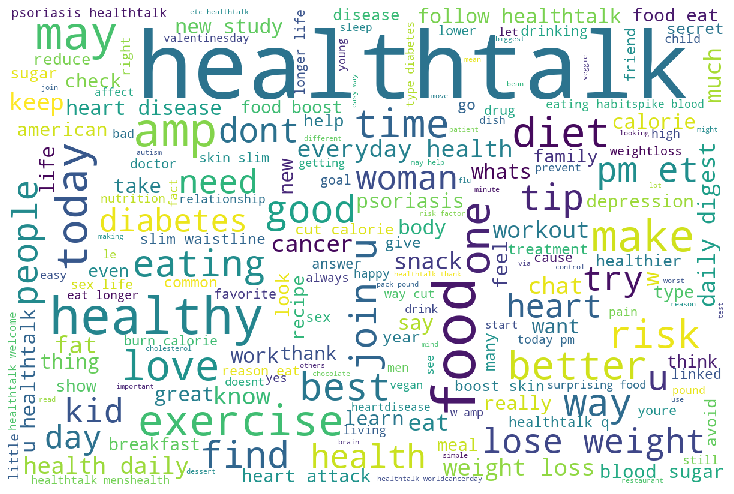

In [41]:
wordcloud = WordCloud(width = 1200, height = 800, background_color ='white', min_font_size = 10).generate(whole_text)

plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Now, since it's a tweet analysis, let's make this word cloud in a shape of twitter logo.

In [42]:
from PIL import Image
mask = np.array(Image.open("img/Twitter-logo.png"))

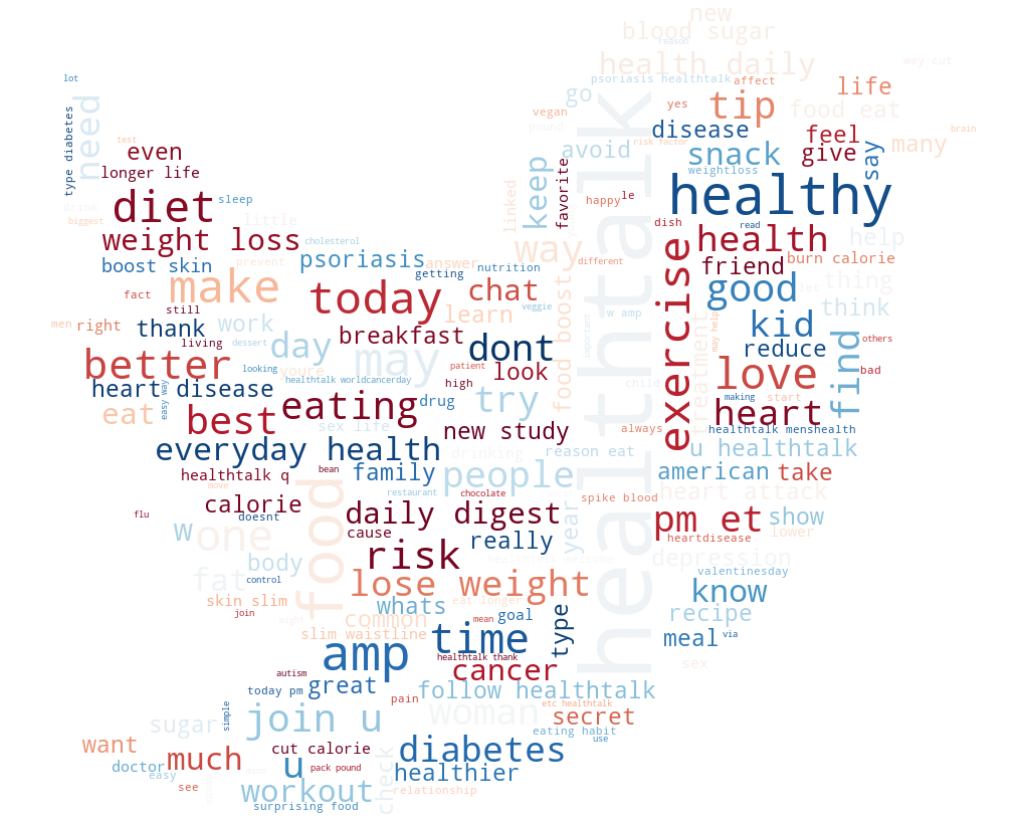

In [43]:
wordcloud = WordCloud(width = 2000, height = 1200, background_color ='white', max_words=200, mask=mask, colormap = 'RdBu').generate(whole_text)

image_colors = ImageColorGenerator(mask)

plt.figure(figsize = (18, 20), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [44]:
from collections import Counter

words_tweets = re.findall(r'\w+', whole_text)
most_popular_words = dict(Counter(words_tweets))

In [45]:
{k: v for k, v in sorted(most_popular_words.items(), key=lambda item: item[1], reverse=True)}

{'healthtalk': 881,
 'food': 329,
 'health': 207,
 'way': 182,
 'weight': 165,
 'u': 164,
 'may': 147,
 'get': 146,
 'healthy': 145,
 'eat': 139,
 'diet': 138,
 'amp': 138,
 'today': 133,
 'heart': 128,
 'help': 126,
 'calorie': 113,
 'new': 110,
 'exercise': 107,
 'reason': 106,
 'day': 105,
 'eating': 105,
 'w': 104,
 'life': 103,
 'make': 100,
 'risk': 100,
 'best': 97,
 'one': 96,
 'join': 95,
 'fat': 92,
 'love': 91,
 'tip': 87,
 'better': 86,
 'say': 86,
 'find': 83,
 'diabetes': 80,
 'boost': 78,
 'q': 76,
 'need': 76,
 'cancer': 75,
 'sex': 74,
 'really': 73,
 'try': 73,
 'psoriasis': 73,
 'like': 71,
 'good': 71,
 'time': 70,
 'youre': 69,
 'et': 69,
 'lose': 65,
 'know': 65,
 'people': 65,
 'chat': 65,
 'dont': 63,
 'sugar': 62,
 'take': 62,
 'study': 60,
 'pm': 59,
 'kid': 58,
 'disease': 58,
 'worst': 57,
 'woman': 56,
 'follow': 56,
 'here': 55,
 'daily': 54,
 'question': 53,
 'keep': 53,
 'soda': 53,
 'habit': 53,
 'work': 53,
 'answer': 52,
 'everyday': 52,
 'blood': 52,

The most frequent word in this dataset was <b>healthtalk</b>, which was a #hashtag used in this thread. Looking at the most used words from this dataset we may assume, that generally speaking tweets were focused around food, health, weight and diet.

# Summary

This Jupyter Notebook was created as a part of Natural Language Processing learning process. As I was following tutorials online and gaining knowledge about text processing, I practiced my skills in this notebook and added comments to maybe help other students in a similar situation. 

In this analysis we:

* used an OCR tool to extract text from an image in two languages (English, Spanish)
* removed stopwords in multiple datasets 
* we cleaned the input data from punctuation marks, numbers, symbols etc.
* practiced tokenization and finding a root word (stemming & lemmatization)
* counted frequency of words in a dataset
* got familiar with a concept of Bag of Words
* visualised the data using a word cloud